<a href="https://colab.research.google.com/github/Srivanth007/CamScanner/blob/main/Cam_Scanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

(1500, 977, 3)
(800, 1500, 3)


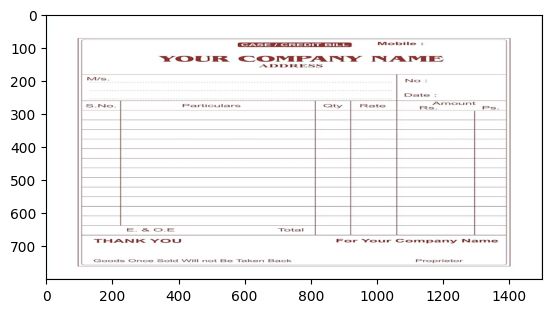

In [66]:
im_path = "/content/billTemp.jpg"
#read image from path
img = cv2.imread(im_path)
print(img.shape)

#img resize
img = cv2.resize(img, (1500, 800))
#convert it from BGR to RGB
print (img.shape)

plt.imshow(img)
plt.show()

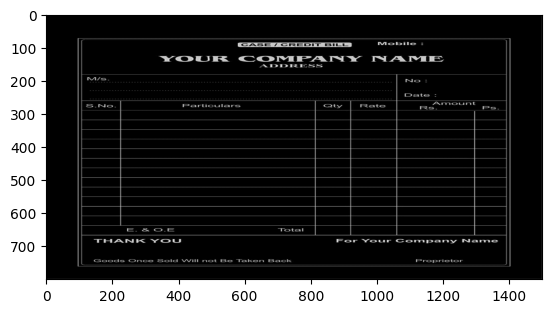

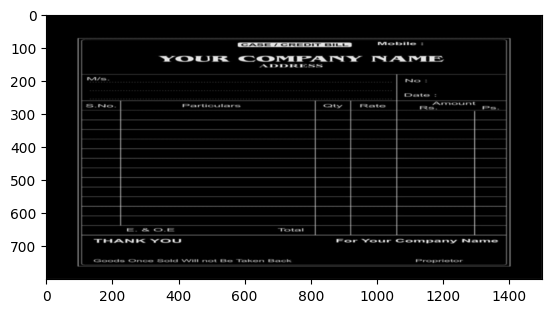

In [67]:
#Remove the Noise

## Image Blurring

orgi = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="binary")
plt.show()

blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred, cmap="binary")
plt.show()

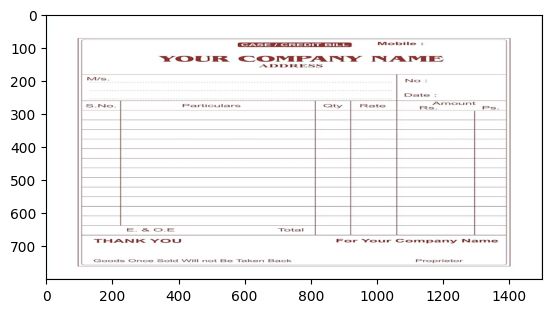

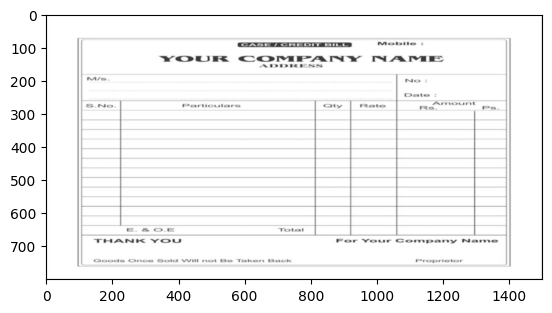

In [68]:
regen = cv2.cvtColor(blurred, cv2.COLOR_GRAY2RGB)
plt.imshow(orgi)
plt.show()

plt.imshow(regen)
plt.show()

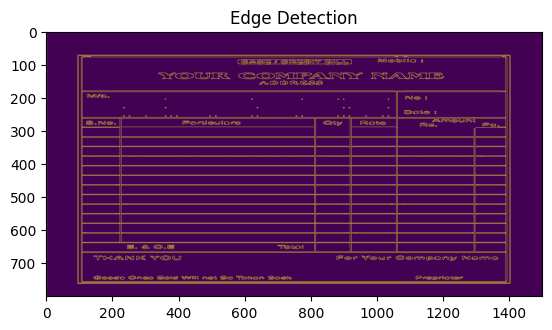

In [69]:
## Edge Detection

edge = cv2.Canny(blurred, 0, 150)
orgi_edge = edge.copy()
plt.imshow(orgi_edge)
plt.title("Edge Detection")
plt.show()

In [70]:
## Countours Extraction

contours, _ = cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))

contours = sorted(contours, reverse=True, key = cv2.contourArea )


847


In [71]:
#Select the best Countour Region

for c in contours:
  p = cv2.arcLength(c, True)
  approx = cv2.approxPolyDP(c, 0.02*p, True)

  if len(approx) == 4:
    target = approx
    break
print(target.shape)

(4, 1, 2)


In [72]:
## reorder the target contor

def reorder(h):

   h = h.reshape((4,2))
   print(h)

   hnew = np.zeros((4,2),dtype=np.float32)
   add = h.sum(axis = 1)
   hnew[3] = h[np.argmax(add)]
   hnew[1] = h[np.argmin(add)]

   diff = np.diff(h,axis = 1)
   hnew[0] = h[np.argmax(diff)]
   hnew[2] = h[np.argmin(diff)]

   return hnew


In [73]:
reorder = reorder(target)
print("*********")
print(reorder)

[[  95   73]
 [  96  762]
 [1404  761]
 [1404   73]]
*********
[[  96.  762.]
 [  95.   73.]
 [1404.   73.]
 [1404.  761.]]


In [74]:
## project to a fixed screen

input_representation = reorder

output_map = np.float32([[0,0], [800,0], [800,800], [0,800]])

In [75]:
M = cv2.getPerspectiveTransform(input_representation, output_map)

ans = cv2.warpPerspective(orgi, M, (800,800))


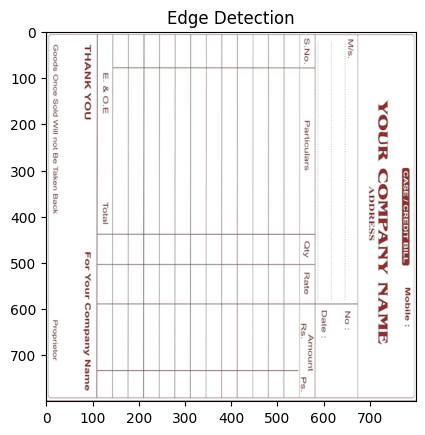

In [76]:
plt.imshow(ans)
plt.title("Edge Detection")
plt.show()

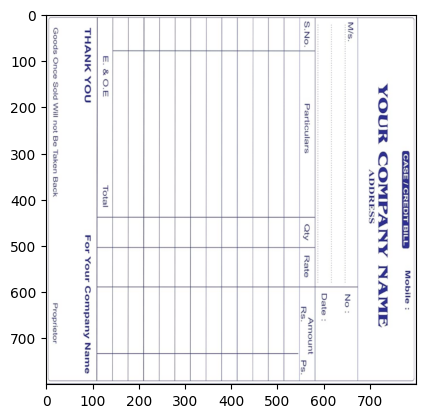

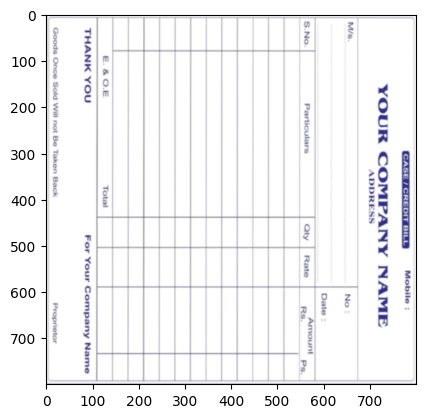

In [77]:
res = cv2.cvtColor(ans, cv2.COLOR_BGR2RGB)

b_res = cv2.GaussianBlur(res, (5, 5), 0)

plt.imshow(res, cmap = "binary")
plt.show()

plt.imshow(b_res, cmap = "binary")
plt.show()